## Projet Annuel

In [1]:
#librairies de traitement des données
import numpy as np
import pandas as pd

# Librairie de visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# librairies de modélisation et prédictions
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

### Import des données

In [2]:
data = pd.read_csv("data/data_sepsis.csv", sep=",")
data.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


In [3]:
# TRAITEMENT
# Supppréssion de la variable ID
# Numérisation de la variable Sepssis
# Normalisation de des features
# Traitement des valeurs manquantes si elles existe

# ANALYSE
# Analyse des variables features (corrélation) pour sélectionner les variables
# Comparaison des des individus positives et negatives en fonction de l'age et d'autres variable pertinantes
# Calcul du nombre du nombre d'individu positive et négative pour savoir si les deux classes sont équilibrées.

# MODÉLISATION
# Modèle de régression logistique
# Sélection du modèle
# Autresmodèles

#PREPATION D'UN PIPELINE POUR LA PRODUCTION

#SAUVEGARDE DU MEILLEUR MODÈLE.

## 1 Traitement des données

In [4]:
#Suppréssion de la variable IS
data = data.drop(['ID'], axis=1)
data.head()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,6,148,72,35,0,33.6,0.627,50,0,Positive
1,1,85,66,29,0,26.6,0.351,31,0,Negative
2,8,183,64,0,0,23.3,0.672,32,1,Positive
3,1,89,66,23,94,28.1,0.167,21,1,Negative
4,0,137,40,35,168,43.1,2.288,33,1,Positive


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PRG        599 non-null    int64  
 1   PL         599 non-null    int64  
 2   PR         599 non-null    int64  
 3   SK         599 non-null    int64  
 4   TS         599 non-null    int64  
 5   M11        599 non-null    float64
 6   BD2        599 non-null    float64
 7   Age        599 non-null    int64  
 8   Insurance  599 non-null    int64  
 9   Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(1)
memory usage: 46.9+ KB


In [6]:
# Il n'existe aucune valeur manquantes dans le jeu de données

### 1.1 Numérisation de la variable Sepssis

In [7]:
data = data.replace({"Positive":1, "Negative":0})
data.head()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,6,148,72,35,0,33.6,0.627,50,0,1
1,1,85,66,29,0,26.6,0.351,31,0,0
2,8,183,64,0,0,23.3,0.672,32,1,1
3,1,89,66,23,94,28.1,0.167,21,1,0
4,0,137,40,35,168,43.1,2.288,33,1,1


### 1.2 Normalisation des features

In [8]:
data_target = data["Sepssis"]
data_features = data.drop(["Sepssis"], axis=1)

In [9]:
scaler = StandardScaler()
features_columns = data_features.columns
data_features = scaler.fit_transform(data_features)
data_features = pd.DataFrame(data_features, columns=features_columns)
data_features.head()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,0.647402,0.852744,0.169109,0.902098,-0.682191,0.209955,0.432333,1.413836,-1.478570
1,-0.840679,-1.076512,-0.141457,0.527197,-0.682191,-0.664876,-0.386002,-0.193804,-1.478570
2,1.242635,1.924553,-0.244979,-1.284822,-0.682191,-1.077297,0.565757,-0.109191,0.676329
3,-0.840679,-0.954020,-0.141457,0.152297,0.124823,-0.477412,-0.931558,-1.039930,0.676329
4,-1.138295,0.515890,-1.487246,0.902098,0.760132,1.397227,5.357163,-0.024579,0.676329


### 1.3 Traitement des valeurs manquantes et aberrantes

In [10]:
# Compter de nombre de valeurs manquantes
data_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PRG        599 non-null    float64
 1   PL         599 non-null    float64
 2   PR         599 non-null    float64
 3   SK         599 non-null    float64
 4   TS         599 non-null    float64
 5   M11        599 non-null    float64
 6   BD2        599 non-null    float64
 7   Age        599 non-null    float64
 8   Insurance  599 non-null    float64
dtypes: float64(9)
memory usage: 42.2 KB


## 2. Analyse

## 2.1 Matrice de corrélation

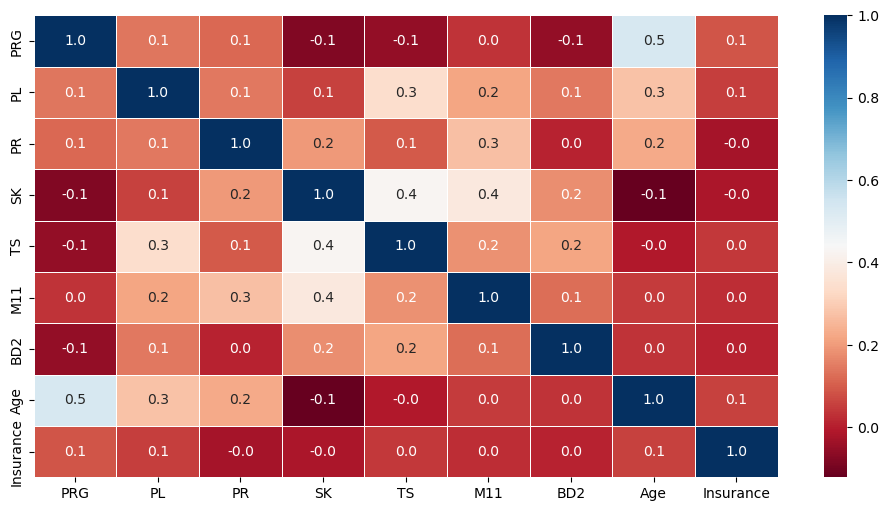

In [11]:
data_corr = data_features.corr()
plt.figure(figsize=(12,6))
axi1 = sns.heatmap(data_corr, annot=True,fmt=".1f",linewidth=.5, cmap="RdBu")
plt.show()

In [12]:
# Nous remarquons une corrélation entre la variable age et PRG.

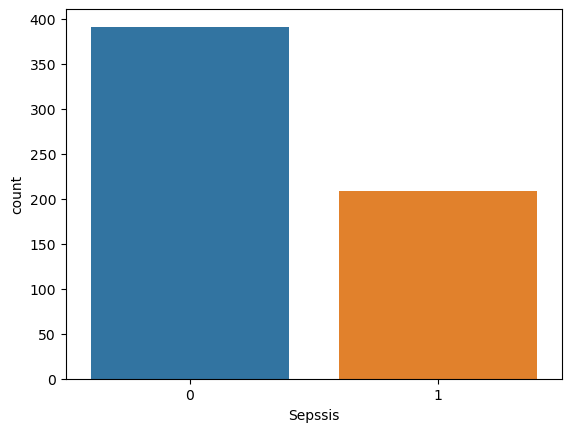

In [13]:
sns.countplot(x=data_target)
plt.show()

In [14]:
# Nous pouvons remarquer un désiquilibre entre les individu positives et négative, nous devons donc prendre cette
# information en compte lors de l'échantillonnage des données d'entrainement et de test.

## 3. Modélisation

## 3. regression logistique

In [15]:
# Echantillonnage des données
X_train, X_test, y_train, y_test = train_test_split(data_features, data_target,test_size=0.2,random_state=2023, shuffle=True, stratify=data_target)

# lors de cet échantillonnage,nous passons la variable cible au parmettre pour nous assurer que la répartition 
# des classes est équilibrée entre les ensembles d'entraînement et de test

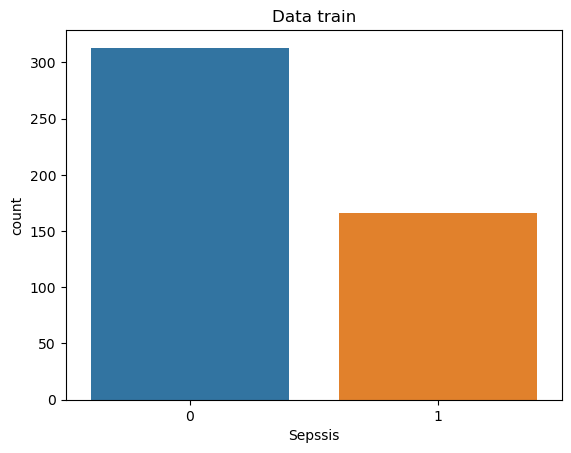

In [16]:
# Instanciation du modèle
sns.countplot(x=y_train)
plt.title("Data train")
plt.show()

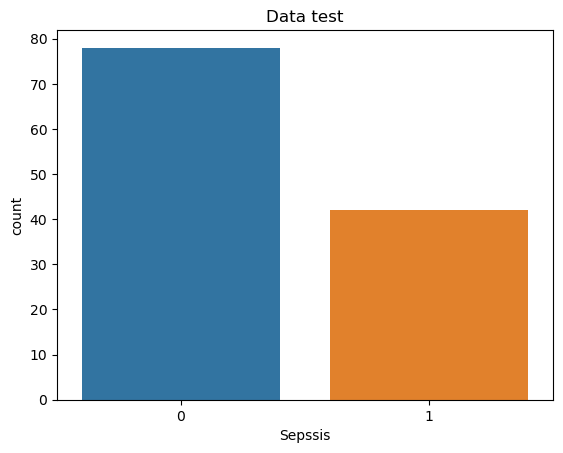

In [17]:
sns.countplot(x=y_test)
plt.title("Data test")
plt.show()

In [18]:
# Instanciation et entrainement du modèle
model_regLog = LogisticRegression().fit(X_train, y_train)

In [19]:
# Estimation du modèle
predict = model_regLog.predict(X_test)
predict_proba = model_regLog.predict_proba(X_test)

In [20]:
# Calcul de l'accuracy
accuracy = accuracy_score(y_test, predict)
print("Exactitude de la prédiction : {:.2f}".format(accuracy))

Exactitude de la prédiction : 0.72


In [21]:
# Affichage des données prédites
data_predict = pd.concat([data_features, pd.DataFrame(predict, columns=["Predict"])], axis=1)
data_predict.head()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Predict
0,0.647402,0.852744,0.169109,0.902098,-0.682191,0.209955,0.432333,1.413836,-1.478570,1.0
1,-0.840679,-1.076512,-0.141457,0.527197,-0.682191,-0.664876,-0.386002,-0.193804,-1.478570,1.0
2,1.242635,1.924553,-0.244979,-1.284822,-0.682191,-1.077297,0.565757,-0.109191,0.676329,0.0
3,-0.840679,-0.954020,-0.141457,0.152297,0.124823,-0.477412,-0.931558,-1.039930,0.676329,0.0
4,-1.138295,0.515890,-1.487246,0.902098,0.760132,1.397227,5.357163,-0.024579,0.676329,1.0


## 3. Sélection de modèle et de variables

In [22]:
# Il faut penser peut être à faire la sélection de modèle avec le pipeline (plusieurs modèle machine learning)

## 4. Pipeline de production

In [23]:
from sklearn.pipeline import Pipeline
import joblib

In [24]:
#Instanciation du pipeline
pipe_modele = Pipeline([('scaler', StandardScaler()), ('classifier', LogisticRegression())])

In [25]:
#Entraitement du modèle
pipe_modele.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', LogisticRegression())])

In [26]:
# Calcul de score du modèle
pipe_modele.score(X_test, y_test)

0.725

In [27]:
# Sauvegarde du modele
joblib.dump(pipe_modele, "../backend/src/model/pipe_modele.model")

['../backend/src/model/pipe_modele.model']

In [28]:
df = {
	"PRG" : 6,
	"PL" : 148,
	"PR" : 72,
	"SK" : 35,
	"TS" : 0,
	"M11" : 33.6,
	"BD2" : 0.627,
	"Age" : 50,
	"Insurance" : 0
}

In [29]:
t = pd.DataFrame([df])
t

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,6,148,72,35,0,33.6,0.627,50,0


In [30]:
pipe_modele.predict(t)

array([1])